# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [3]:
# this is a comprehensive list of dependencies in order to run linear regression and classification.
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U seaborn
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

##!pip install -U scikit-learn --user


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [4]:
EVP = pd.read_csv("EVP.csv")
# copying data to another varaible to avoid any changes to original data
df = EVP.copy()
data = EVP.copy()

<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [49]:
import bamboolib as bam

data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,continentNum,educationNum,regionNum
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1,9,13
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1,8,11
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1,7,13
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1,7,13
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,5,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,1,7,12
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,1,9,11
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1,8,12
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,1,8,13


<IPython.core.display.Javascript object>

In [51]:
sns.barplot(
    x="case_status",
    y="education_of_employee",
    data=data,
    estimator=sum,
    ci=None,
    color="continent",
)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<IPython.core.display.Javascript object>

## Data Overview

Observations:
- There are 25480 records in 12 columns; This will expand to 25 columns after data processing 
- No negative values
- No missing values
- All values are numeric
- Data is normalized to ensure same scale of comparison

In [6]:
def continent_to_numeric(x):  # continent will also need to be numeric.
    if x == "Asia":
        return 1
    if x == "Europe":
        return 2
    if x == "North America":
        return 3
    if x == "South America":
        return 4
    if x == "Africa":
        return 5
    if x == "Oceania":
        return 6


data["continentNum"] = data["continent"].apply(continent_to_numeric)
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

<IPython.core.display.Javascript object>

In [7]:
def education_to_numeric(x):  # education will also need to be numeric.
    if x == "Bachelor's":
        return 7
    if x == "Master's":
        return 8
    if x == "High School":
        return 9
    if x == "Doctorate":
        return 10


data["educationNum"] = data["education_of_employee"].apply(education_to_numeric)
print(df)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

<IPython.core.display.Javascript object>

In [8]:
def region_of_employment_to_numeric(
    x,
):  # region_of_employment will also need to be numeric.
    if x == "Northeast":
        return 11
    if x == "South":
        return 12
    if x == "West":
        return 13
    if x == "Midwest":
        return 14
    if x == "Island":
        return 15


data["regionNum"] = data["region_of_employment"].apply(region_of_employment_to_numeric)
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [10]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,continentNum,educationNum,regionNum
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1,9,13
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,1,8,11
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1,7,13
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1,7,13
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,5,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,1,7,12
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,1,9,11
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1,8,12
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,1,8,13


<IPython.core.display.Javascript object>

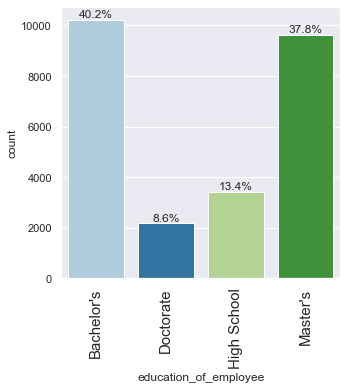

<IPython.core.display.Javascript object>

In [11]:
labeled_barplot(data, "education_of_employee", perc=True)

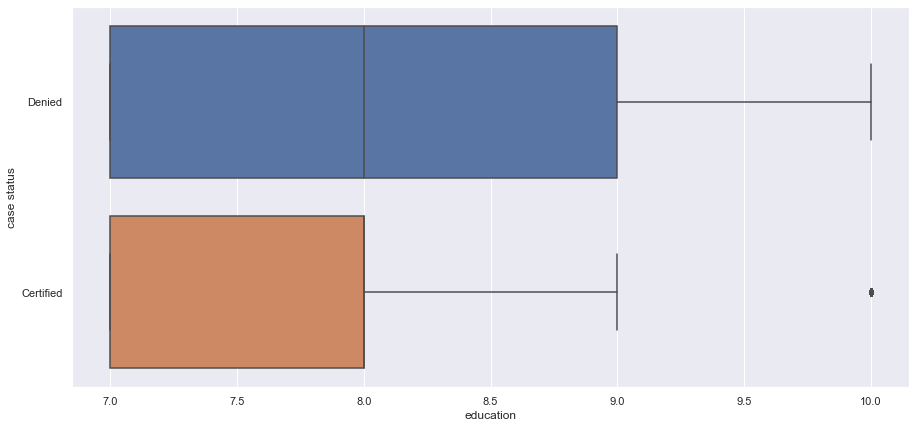

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(15, 7))
sns.boxplot(data["educationNum"], data["case_status"])
plt.ylabel("case status")
plt.xlabel("education")
plt.show()

In [13]:
# How does the visa status vary across different continents?
# 2. case_status vs continent

<IPython.core.display.Javascript object>

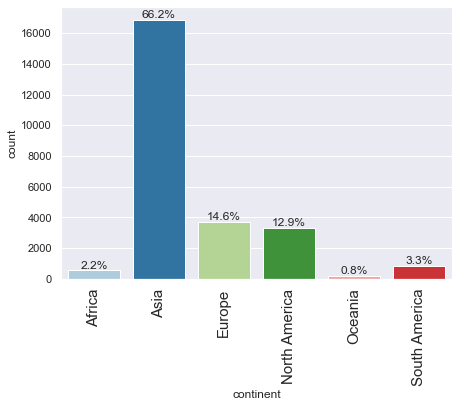

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "continent", perc=True)

In [15]:
# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
# 3. case_status vs has_job_experience

<IPython.core.display.Javascript object>

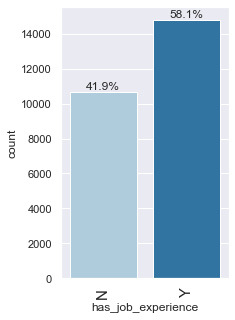

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "has_job_experience", perc=True)

In [17]:
# In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
# 4. case_status vs unit_of_wage

<IPython.core.display.Javascript object>

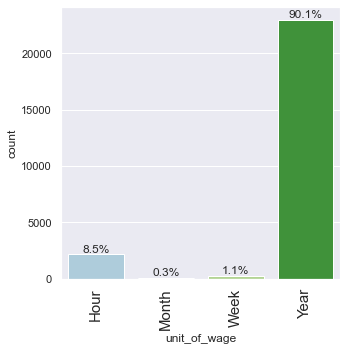

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "unit_of_wage", perc=True)

In [19]:
# The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
# 5. case_status vs prevailing_wage
# note- this also can be compared to my annual_value column to see if the annual value of the employee correlates to case status.

<IPython.core.display.Javascript object>

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
 12  continentNum           25480 non-null  int64  
 13  educationNum           25480 non-null  int64  
 14  regionNum              25480 non-null  int64  
dtypes:

<IPython.core.display.Javascript object>

In [21]:
# sns.pairplot(data)

<IPython.core.display.Javascript object>

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [22]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


<IPython.core.display.Javascript object>

In [23]:
# Data Formatting:
# Drop unnecessary
# Change to Numeric
# Get Dummies
# Set as Category

<IPython.core.display.Javascript object>

In [24]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


<IPython.core.display.Javascript object>

In [25]:
df.count()

case_id                  25480
continent                25480
education_of_employee    25480
has_job_experience       25480
requires_job_training    25480
no_of_employees          25480
yr_of_estab              25480
region_of_employment     25480
prevailing_wage          25480
unit_of_wage             25480
full_time_position       25480
case_status              25480
dtype: int64

<IPython.core.display.Javascript object>

In [26]:
# Drop Unnecessary
# checking for missing values
df.isnull().sum()
# 0 Missisng values
# Drop
df = df.dropna()
# Drop case_id and year_estab
df.drop("case_id", axis=1, inplace=True)
#
df.drop("yr_of_estab", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

In [27]:
df["continent"].value_counts(dropna=False)
# Dummies

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
df["education_of_employee"].value_counts(dropna=False)
# Dummies

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
df["has_job_experience"].value_counts(dropna=False)
# Dummies

Y    14802
N    10678
Name: has_job_experience, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["requires_job_training"].value_counts(dropna=False)
# Dummies

N    22525
Y     2955
Name: requires_job_training, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
df["no_of_employees"].value_counts(dropna=False)
# good to go

183      18
854      16
724      16
1476     15
766      15
         ..
95881     1
5749      1
4026      1
5715      1
5718      1
Name: no_of_employees, Length: 7105, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
df["region_of_employment"].value_counts(dropna=False)
# Dummies

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df["prevailing_wage"].value_counts(dropna=False)
# No further processing

127.8900       2
74645.9200     2
110.5100       2
6036.6700      2
58770.0500     2
              ..
122622.0800    1
182.8141       1
103387.5500    1
19724.4000     1
57734.0900     1
Name: prevailing_wage, Length: 25454, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df["unit_of_wage"].value_counts(dropna=False)
# Standardize this value
# Replace with multiplication factor to standardize at annual value.

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
# Change Unit_of_wage to annual value modifier
# In order to deal with difference between yearly salary and hourly, weekly, and monthly, I will create a new column called annual value.


def to_annual_value(x):
    if x == "Week":
        return 52
    if x == "Month":
        return 12
    if x == "Hour":
        return 2080
    if x == "Year":
        return 1


df["annual_value_modifier"] = df["unit_of_wage"].apply(to_annual_value)
# print (df)

<IPython.core.display.Javascript object>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
 10  annual_value_modifier  25480 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [37]:
df["annual_val"] = df["prevailing_wage"] * df["annual_value_modifier"]
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,annual_value_modifier,annual_val
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,2080,1231782.032
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,1,83425.650
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,1,122996.860
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,1,83434.030
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,1,149907.390
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,Certified,1,77092.570
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,Certified,1,279174.790
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,Certified,1,146298.850
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,Certified,1,86154.770


<IPython.core.display.Javascript object>

In [38]:
# Drop annual_value_modifier and prevailing_wage
df.drop("annual_value_modifier", axis=1, inplace=True)
#
df.drop("prevailing_wage", axis=1, inplace=True)
#
df.drop("unit_of_wage", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   full_time_position     25480 non-null  object 
 7   case_status            25480 non-null  object 
 8   annual_val             25480 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


<IPython.core.display.Javascript object>

In [39]:
df["full_time_position"].value_counts(dropna=False)

Y    22773
N     2707
Name: full_time_position, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
df["case_status"].value_counts(dropna=False)

Certified    17018
Denied        8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   full_time_position     25480 non-null  object 
 7   case_status            25480 non-null  object 
 8   annual_val             25480 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.9+ MB


<IPython.core.display.Javascript object>

In [42]:
# Get Dummies
df = pd.get_dummies(
    df,
    columns=[
        "continent",
        "education_of_employee",
        "has_job_experience",
        "requires_job_training",
        "region_of_employment",
        "full_time_position",
        "case_status",
    ],
    dtype=float,
)  # this worked
df.head()

,no_of_employees,annual_val,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
0,14513,1231782.032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2412,83425.650,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,44444,122996.860,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,98,83434.030,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1082,149907.390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<IPython.core.display.Javascript object>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25480 entries, 0 to 25479
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no_of_employees                    25480 non-null  int64  
 1   annual_val                         25480 non-null  float64
 2   continent_Africa                   25480 non-null  float64
 3   continent_Asia                     25480 non-null  float64
 4   continent_Europe                   25480 non-null  float64
 5   continent_North America            25480 non-null  float64
 6   continent_Oceania                  25480 non-null  float64
 7   continent_South America            25480 non-null  float64
 8   education_of_employee_Bachelor's   25480 non-null  float64
 9   education_of_employee_Doctorate    25480 non-null  float64
 10  education_of_employee_High School  25480 non-null  float64
 11  education_of_employee_Master's     25480 non-null  flo

<IPython.core.display.Javascript object>

In [44]:
# Negative number error in number of employees; I didn't have this problem but others complained of negative #s. I assumed a typo; thus I eliminated all possible negatives from this column.
df.no_of_employees.abs()
# print(df)

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
df.describe()

,no_of_employees,annual_val,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
count,25480.000000,2.548000e+04,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.043210,1.973912e+05,0.021625,0.661735,0.146468,0.129199,0.007535,0.033438,0.401648,0.086028,0.134223,0.378100,0.419074,0.580926,0.884027,0.115973,0.014717,0.169035,0.282378,0.275392,0.258477,0.106240,0.893760,0.667896,0.332104
std,22877.928848,5.785917e+05,0.145458,0.473129,0.353582,0.335427,0.086480,0.179781,0.490241,0.280411,0.340898,0.484922,0.493417,0.493417,0.320199,0.320199,0.120422,0.374790,0.450165,0.446721,0.437806,0.308151,0.308151,0.470977,0.470977
min,-26.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1022.000000,4.710796e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2109.000000,8.283946e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3504.000000,1.248250e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,602069.000000,1.456915e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [46]:
df.describe()

,no_of_employees,annual_val,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
count,25480.000000,2.548000e+04,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.043210,1.973912e+05,0.021625,0.661735,0.146468,0.129199,0.007535,0.033438,0.401648,0.086028,0.134223,0.378100,0.419074,0.580926,0.884027,0.115973,0.014717,0.169035,0.282378,0.275392,0.258477,0.106240,0.893760,0.667896,0.332104
std,22877.928848,5.785917e+05,0.145458,0.473129,0.353582,0.335427,0.086480,0.179781,0.490241,0.280411,0.340898,0.484922,0.493417,0.493417,0.320199,0.320199,0.120422,0.374790,0.450165,0.446721,0.437806,0.308151,0.308151,0.470977,0.470977
min,-26.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1022.000000,4.710796e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2109.000000,8.283946e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3504.000000,1.248250e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,602069.000000,1.456915e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

In [47]:
# Outlier detection and treatment (if needed)
plt.hist(df["weight"], 20)
plt.title("Histogram of Weight")
plt.show()

sns.boxplot(df["weight"])
plt.title("Boxplot of Weight")
plt.show()

KeyError: 'weight'

<IPython.core.display.Javascript object>

## Building bagging and boosting models

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations